In [209]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing as pp
%matplotlib inline
import matplotlib.pyplot as plt

In [210]:
churn_df = pd.read_csv("ChurnData.csv")

In [211]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [212]:
churn_df = churn_df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]

In [213]:
churn_df['churn'] = churn_df['churn'].astype('int')

In [214]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [215]:
churn_df.shape

(200, 10)

In [216]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [217]:
X = np.asarray(churn_df[['tenure','age','address','income','ed','employ','equip']])

In [218]:
Y = np.asarray(churn_df[['churn']])

In [219]:
Y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [220]:
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [221]:
X = pp.StandardScaler().fit(X).transform(X)

In [222]:
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4)

In [225]:
print('Train set:', X_train.shape, Y_train.shape)

Train set: (160, 7) (160, 1)


In [226]:
print('Test set:', X_test.shape, Y_test.shape)

Test set: (40, 7) (40, 1)


In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
from sklearn.metrics import confusion_matrix

In [244]:
LR = LogisticRegression(C= 0.05, solver = 'newton-cg').fit(X_train,Y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [245]:
LR

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [246]:
yhat = LR.predict(X_test)

In [247]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [248]:
yhat_prob = LR.predict_proba(X_test)

In [249]:
yhat_prob

array([[0.72, 0.28],
       [0.85, 0.15],
       [0.78, 0.22],
       [0.88, 0.12],
       [0.78, 0.22],
       [0.73, 0.27],
       [0.71, 0.29],
       [0.84, 0.16],
       [0.42, 0.58],
       [0.88, 0.12],
       [0.79, 0.21],
       [0.85, 0.15],
       [0.6 , 0.4 ],
       [0.46, 0.54],
       [0.88, 0.12],
       [0.71, 0.29],
       [0.66, 0.34],
       [0.65, 0.35],
       [0.63, 0.37],
       [0.71, 0.29],
       [0.85, 0.15],
       [0.68, 0.32],
       [0.89, 0.11],
       [0.65, 0.35],
       [0.65, 0.35],
       [0.93, 0.07],
       [0.7 , 0.3 ],
       [0.69, 0.31],
       [0.69, 0.31],
       [0.94, 0.06],
       [0.91, 0.09],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       [0.93, 0.07],
       [0.84, 0.16],
       [0.86, 0.14],
       [0.39, 0.61],
       [0.69, 0.31],
       [0.89, 0.11],
       [0.69, 0.31]])

In [250]:
from sklearn.metrics import jaccard_similarity_score 
jaccard_similarity_score(Y_test,yhat)

0.725

In [251]:
from sklearn.metrics import jaccard_similarity_score

In [252]:
jaccard_similarity_score(Y_test,yhat)

0.725

In [253]:
from sklearn.metrics import classification_report, confusion_matrix

In [254]:
import itertools

In [255]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(cm,classes,normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    if normalize: 
            cm = cm.astype('float')/cm.sum(axis = 1)
            print("Normalized Confusion Matrix")
    else:
            print("Confusion Matrix, without normalization")
    print(cm)
        
    
    
    plt.imshow(cm, interpolation = 'nearest', cmap =cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center', 
                 color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
print(confusion_matrix(Y_test,yhat,labels = [1,0]))

[[ 4 11]
 [ 0 25]]


Confusion Matrix, without normalization
[[ 4 11]
 [ 0 25]]


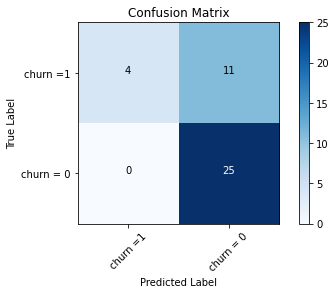

In [256]:
cnf_matrix = confusion_matrix(Y_test,yhat,labels =[1,0])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = ['churn =1','churn = 0'],normalize = False, title = 'Confusion Matrix')

In [257]:
print(classification_report(Y_test,yhat))


              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

   micro avg       0.72      0.72      0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



In [258]:
from sklearn.metrics import log_loss
log_loss(Y_test,yhat_prob)

0.5855599103676811

## Inspired by IBM Data Science Courses
### Author: Abid Raza